## <font color = 'green'>0. Importing libraries/dataset</font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import inspect
import winsound

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
# since the categorical data have been encoded and SMOTE has already been applied during the previous lab, that data have been exported into a .csv file which will be used instead of the unprocessed data provided
churndata = pd.read_csv('churndata_smoted.csv', index_col=0)
churndata

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,churn
0,0,-1.277445,-1.160323,-0.992611,0.0,1.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
1,0,0.066327,-0.259629,-0.172165,1.0,0.000000,0.000000,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,No
2,0,-1.236724,-0.362660,-0.958066,1.0,0.000000,0.000000,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
3,0,0.514251,-0.746535,-0.193672,1.0,0.000000,0.000000,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,No
4,0,-1.236724,0.197365,-0.938874,0.0,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,-0.927992,0.677045,-0.644306,0.0,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Yes
10344,0,-1.031992,-1.485943,-0.943737,0.0,0.675919,0.000000,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Yes
10345,0,-1.096677,0.820523,-0.797414,0.0,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Yes
10346,0,-0.119937,0.718722,0.123175,0.0,0.000000,0.878905,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Yes


## <font color = 'green'>1. Applying Random Forests algorithm</font>

In [3]:
# X/y split
X = churndata.drop('churn', axis = 1)
y = churndata['churn']

In [4]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # default test size is .25 and will not be changed

<font color = 'lightseagreen'>**- RandomForestRegressor will first run without hyperparameter tuning to set a benchmark**<font>

              precision    recall  f1-score   support

          No       0.84      0.84      0.84      1298
         Yes       0.84      0.84      0.84      1289

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587



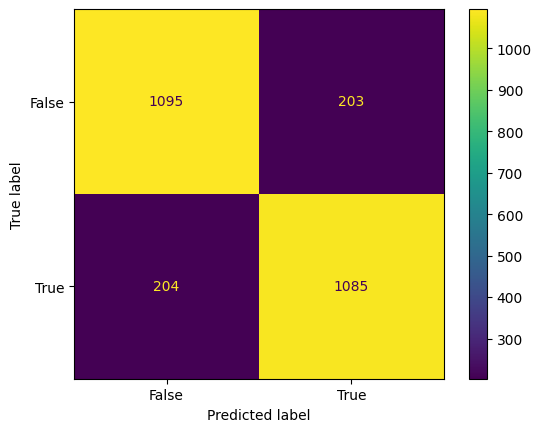

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
class_scores = classification_report(y_test, predictions)
print(class_scores)

cm = metrics.confusion_matrix(y_test, predictions)
cm_viz = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_viz.plot()
plt.show()

The model performs rather well even without parameter tuning with precision, recall, f1-score for the 2 classes as well as the overall accuracy being 84%.
<br>Next, RandomizedSearschCV and GridSearchCV will be applied in an attempt to explore whether hyperparameter tuning could make it even more accurate.

<font color = 'lightseagreen'>**- Hyperparameter tuning using RandomizedSearchCV**<font>

In [7]:
# RandomForestClassifier's parameters along with their default values
inspect.signature(RandomForestClassifier.__init__)

<Signature (self, n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)>

In [8]:
# to get a list of the model's parameters' names
RandomForestClassifier._get_param_names()

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [63]:
# creating a dictionary with potential values or ranges of values for the parameters
param_dist = {'bootstrap' : [True, False],
 'ccp_alpha' : np.arange(0.0, 1.0, 0.1),
 'class_weight': ['balanced', 'balanced_subsample'],
 'criterion' : ['gini', 'entropy', 'log_loss'],
 'max_depth' : [3, 15],
 'max_features' : range(1, 22, 1),
# 'max_leaf_nodes',     # no limit set
# 'max_samples',        # default X.shape[0] samples 
 'min_impurity_decrease' : np.arange(0.0, 1.0, 0.1),
# 'min_samples_leaf',   # left to default (1)
 'min_samples_split' : range(2, 11, 1),
 'min_weight_fraction_leaf' : np.arange(0.0, 0.5, 0.1),
 'n_estimators' : range(50, 250),
 'warm_start':[True, False],
# 'oob_score',          # better understanding of the model is needed to use this one
 'random_state' : [None, 42],
                } 

In [64]:
# using RandomizedSearchCV
rs_cv = RandomizedSearchCV(estimator=rf,
                         param_distributions=param_dist,
                         scoring = 'accuracy',
                         cv = 2,
                         verbose = 2,
                         n_jobs = 15, return_train_score=True)
rs_cv.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=15,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 15],
                                        'max_features': range(1, 22),
                                        'min_impurity_decrease': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'min_samples_split': range(2, 11),
                                        'min_weight_fraction_leaf': array([0. , 0.1, 0.2, 0.3, 0.4]),
                                        'n_estimators': range(50, 250),
                                        'random_state': [None, 42],
                                        'warm_start': [True, False]},
                   return_train_score=True, scoring='accuracy', verbose=2)

In [65]:
# to see all the different combinations of parameter values used
rs_cv.cv_results_

{'mean_fit_time': array([0.9112047 , 0.66915107, 0.44509995, 0.92770886, 0.50160909,
        1.00272655, 0.76317155, 0.41659367, 0.4756074 , 0.45360184]),
 'std_fit_time': array([0.02200449, 0.00100064, 0.00300086, 0.00850201, 0.00549769,
        0.01750302, 0.00700128, 0.02350533, 0.00150013, 0.00350142]),
 'mean_score_time': array([0.06401396, 0.06601429, 0.04301012, 0.06651449, 0.06151462,
        0.07151568, 0.05901325, 0.0585134 , 0.03250647, 0.0395087 ]),
 'std_score_time': array([0.00100064, 0.00400138, 0.0020014 , 0.00250053, 0.00150037,
        0.00249946, 0.00199997, 0.00850201, 0.00350094, 0.00049984]),
 'param_warm_start': masked_array(data=[True, True, False, True, False, True, True, False,
                    False, False],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[42, 42, None, None, 42, 42, 42, 42, None, 42],


In [66]:
# preparing best parameter dict to be copied and pasted as the Random Forests model's arguments
best_params = str(rs_cv.best_params_)
best_params = best_params.replace(":", "=").replace("'", "").replace("{","").replace("}","")
best_params

'warm_start= False, random_state= None, n_estimators= 103, min_weight_fraction_leaf= 0.1, min_samples_split= 6, min_impurity_decrease= 0.0, max_features= 4, max_depth= 15, criterion= log_loss, class_weight= balanced_subsample, ccp_alpha= 0.1, bootstrap= False'

              precision    recall  f1-score   support

          No       0.67      0.76      0.71      1298
         Yes       0.72      0.63      0.67      1289

    accuracy                           0.70      2587
   macro avg       0.70      0.70      0.69      2587
weighted avg       0.70      0.70      0.69      2587



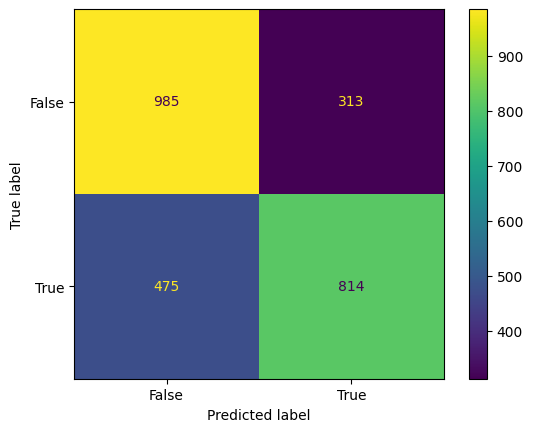

In [67]:
# running model with the suggested parameters
rf_rs = RandomForestClassifier(warm_start= False, random_state= None, n_estimators= 103, min_weight_fraction_leaf= 0.1, min_samples_split= 6, min_impurity_decrease= 0.0, max_features= 4, max_depth= 15, criterion= 'log_loss', class_weight= 'balanced_subsample', ccp_alpha= 0.1, bootstrap= False)
rf_rs.fit(X_train, y_train)

rs_preds = rf_rs.predict(X_test)
rs_class_scores = classification_report(y_test, rs_preds)
print(rs_class_scores)

cm_rs = metrics.confusion_matrix(y_test, rs_preds)
cm_viz_rs = ConfusionMatrixDisplay(confusion_matrix=cm_rs, display_labels=[False, True])
cm_viz_rs.plot()
plt.show()

The model was more accurate running without any parameter tuning. Its accuracy has decreased by 14%.

<font color = 'lightseagreen'>**- Hyperparameter tuning using GridSearchCV**<font>

<font color = 'red'>*Unfortunately, due to the vast number of parameter combinations allowed to the GridSearchCV algorithm, it did not finish running in time for the lab to be submitted. That happened due to the fact, that instead of randomization in the choice of parameter combinations (as in the case of RandomizedSearchCV), GridSearchCV will go over all possible combinations of values*<font>

In [ ]:
# running GridSearchCV using the same dictionary with potential parameter values that were used for RandomizedSearchCV
grid_search = GridSearchCV(rf, param_dist, cv=2,
                           scoring='accuracy',
                           return_train_score=True, n_jobs=15)

grid_search.fit(X_train,y_train)
grid_search.best_params_

In [ ]:
# using a window sound to inform us that the code in the cell has finished running, since it takes a long time for it to run
winsound.PlaySound('sound.wav', winsound.SND_FILENAME)